In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#check encoding type
with open('StarWars.csv') as file:
    print(file)


<_io.TextIOWrapper name='StarWars.csv' mode='r' encoding='cp1252'>


In [3]:
pd.set_option('display.max_columns', 500)

star_wars = pd.read_csv("StarWars.csv", encoding = "cp1252")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

# Column Cleaning
Columns are messy due to the formatting of the csv output from survey monkey, hence we will revise it by building a mapping dictionary in two pieces: 

In [4]:
#build dictionary 1
d1 = {
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_ep1',
    'Unnamed: 4' : 'seen_ep2',
    'Unnamed: 5' : 'seen_ep3',
    'Unnamed: 6' : 'seen_ep4',
    'Unnamed: 7' : 'seen_ep5',
    'Unnamed: 8' : 'seen_ep6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'favorite_ep1',
    'Unnamed: 10' : 'favorite_ep2',
    'Unnamed: 11' : 'favorite_ep3',
    'Unnamed: 12' : 'favorite_ep4',
    'Unnamed: 13' : 'favorite_ep5',
    'Unnamed: 14' : 'favorite_ep6'
}

In [5]:
#build two lists
indexes = star_wars.columns.tolist()[15:29]
names = star_wars.iloc[0,15:29].tolist()

print(names)

['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']


In [6]:
#make columns slightly more self_explanatory
names = ["feeling_{}".format(name) for name in names]
print(names)

['feeling_Han Solo', 'feeling_Luke Skywalker', 'feeling_Princess Leia Organa', 'feeling_Anakin Skywalker', 'feeling_Obi Wan Kenobi', 'feeling_Emperor Palpatine', 'feeling_Darth Vader', 'feeling_Lando Calrissian', 'feeling_Boba Fett', 'feeling_C-3P0', 'feeling_R2 D2', 'feeling_Jar Jar Binks', 'feeling_Padme Amidala', 'feeling_Yoda']


In [7]:
#create a dictionary from the two lists defined above
d2 = dict(zip(indexes, names))

#merge dictionaries
mapping_dictionary = {**d1, **d2}
mapping_dictionary

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep1',
 'Unnamed: 4': 'seen_ep2',
 'Unnamed: 5': 'seen_ep3',
 'Unnamed: 6': 'seen_ep4',
 'Unnamed: 7': 'seen_ep5',
 'Unnamed: 8': 'seen_ep6',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'favorite_ep1',
 'Unnamed: 10': 'favorite_ep2',
 'Unnamed: 11': 'favorite_ep3',
 'Unnamed: 12': 'favorite_ep4',
 'Unnamed: 13': 'favorite_ep5',
 'Unnamed: 14': 'favorite_ep6',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'feeling_Han Solo',
 'Unnamed: 16': 'feeling_Luke Skywalker',
 'Unnamed: 17': 'feeling_Princess Leia Organa',
 'Unnamed: 18': 'feeling_Anakin Skywalker',
 'Unnamed: 19': 'feeling_Obi Wan Kenobi',
 'Unnamed: 20': 'feeling_Emperor Palpatine',
 'Unnamed: 21': 'feeling_Darth Vader',
 'Unnamed: 22': 'feeling_Lando Calrissian',
 'Un

In [8]:
#rename all columns and slice row indexed zero
star_wars = star_wars.rename(columns = mapping_dictionary)

#drop row 0 and reset index of the whole dataframe
star_wars = star_wars.drop(0).reset_index(drop= True)

In [9]:
star_wars.head()

,index,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,favorite_ep1,favorite_ep2,favorite_ep3,favorite_ep4,favorite_ep5,favorite_ep6,feeling_Han Solo,feeling_Luke Skywalker,feeling_Princess Leia Organa,feeling_Anakin Skywalker,feeling_Obi Wan Kenobi,feeling_Emperor Palpatine,feeling_Darth Vader,feeling_Lando Calrissian,feeling_Boba Fett,feeling_C-3P0,feeling_R2 D2,feeling_Jar Jar Binks,feeling_Padme Amidala,feeling_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Converting column values into numbers
We have a number of columns expressed as string values which ultimately can be valorized as Boolean values (True-False / 1-0).

In [10]:
star_wars.iloc[:,2:4]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,Yes,Yes
1,No,NaN
2,Yes,No
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,No


In [11]:
def yn_convert(x):
    if x == "Yes":
        return True
    elif x == "No":
        return False
    else:
        return x

In [12]:
#apply mapping and confirm first reassignment
star_wars.iloc[:,2:4] = star_wars.iloc[:,2:4].applymap(yn_convert)

## Seen_ep{} columns

In [13]:
#manage all columns seen_ep{} - change all notnulls into True
star_wars.iloc[:,4:10] = star_wars.iloc[:,4:10].applymap(lambda x: True if pd.notnull(x) else x)

In [14]:
star_wars.head()

,index,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,favorite_ep1,favorite_ep2,favorite_ep3,favorite_ep4,favorite_ep5,favorite_ep6,feeling_Han Solo,feeling_Luke Skywalker,feeling_Princess Leia Organa,feeling_Anakin Skywalker,feeling_Obi Wan Kenobi,feeling_Emperor Palpatine,feeling_Darth Vader,feeling_Lando Calrissian,feeling_Boba Fett,feeling_C-3P0,feeling_R2 D2,feeling_Jar Jar Binks,feeling_Padme Amidala,feeling_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [15]:
star_wars["favorite_ep1"].apply(type).value_counts(dropna=False)

<class 'str'>      835
<class 'float'>    351
Name: favorite_ep1, dtype: int64

In [16]:
#convert all data into float from strings to perform analysis
star_wars.iloc[:,10:16] = star_wars.iloc[:,10:16].astype(float)

## feeling{} columns

In [17]:
feel_cols = star_wars.columns[star_wars.columns.str.contains("feeling")]

In [18]:
star_wars[feel_cols].iloc[:,1].value_counts()

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: feeling_Luke Skywalker, dtype: int64

In [19]:
feel_dict = {
    "Very favorably" : 5,
    "Somewhat favorably": 4,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat unfavorably": 2,
    "Unfamiliar (N/A)" : np.nan,
    "Very unfavorably" : 1
}

In [20]:
#apply dictionary and transform columns into nuemeric values
star_wars[feel_cols] = star_wars[feel_cols].replace(feel_dict)

#fill NaNs with mean of column (calculated along all rows)
#means = star_wars[feel_cols].mean(axis=0)
#star_wars[feel_cols] = star_wars[feel_cols].fillna(means)

# Analyzing favourite episodes and ranking
Let's retrieve which episodes have been seen the most and let's see how they correlate with users'preferences and ranking.
We will:
- plot results for seen_episodes
- plot results for favorite_ep (lower scores = liked better!)
- pull the two series together in a scatter plot and check for correlation

In [21]:
seen_cols = ["seen_ep{}".format(num) for num in range(1,7)]
favorite_cols = ["favorite_ep{}".format(num) for num in range(1,7)]

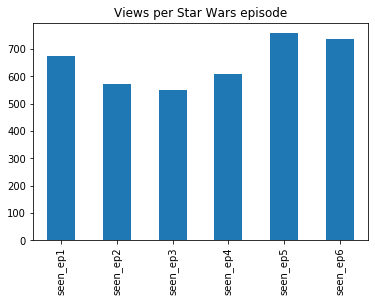

In [22]:
star_wars[seen_cols].sum(axis=0).plot.bar(title="Views per Star Wars episode")

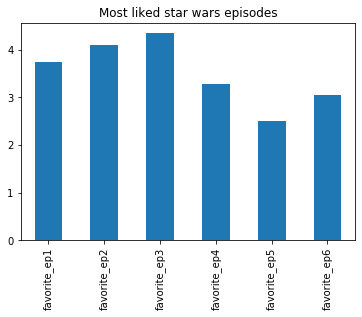

In [23]:
star_wars[favorite_cols].mean(axis=0).plot.bar(title = "Most liked star wars episodes")

Let's now plot them onto a scatter plot

In [24]:
adhoc_dict = {
    'seen': star_wars[seen_cols].sum(axis=0).values, #values avoids picking up also the indexes of the series
    'liked': star_wars[favorite_cols].mean(axis=0).values
    }
df = pd.DataFrame(data=adhoc_dict, index= ["ep{}".format(num) for num in range(1,7)])
df

,seen,liked
ep1,673.0,3.732934
ep2,571.0,4.087321
ep3,550.0,4.341317
ep4,607.0,3.272727
ep5,758.0,2.513158
ep6,738.0,3.047847


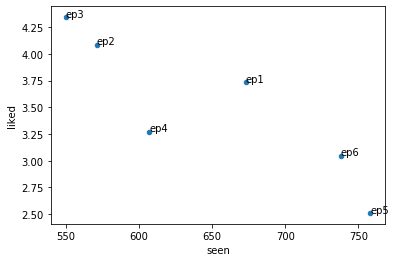

In [25]:
fig, ax = plt.subplots()
df.plot('seen', 'liked', kind='scatter', ax=ax)

for k, v in df.iterrows():
    ax.annotate(k, v)

def temp(x):
    if x == True:
        return float(1)
    elif pd.isna(x):
        return 0
    else:
        return x

new = star_wars.iloc[:,4:16]
new = new.applymap(temp).dropna().reset_index(drop = True)


#combined_filtered.corr()
#plt.matshow(combined_filtered.corr())
#plt.show()

corr = new.corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(new.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new.columns)
ax.set_yticklabels(new.columns)
plt.show()


There's an overall strong correlation: the more an episode has been seen, the more it is ranked as the best of the pack, with **Episode 5, the Empire strikes Back, being the top in line**.

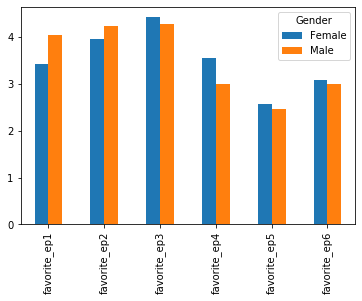

In [26]:
star_wars[favorite_cols].groupby(star_wars["Gender"]).agg("mean").T.plot.bar()

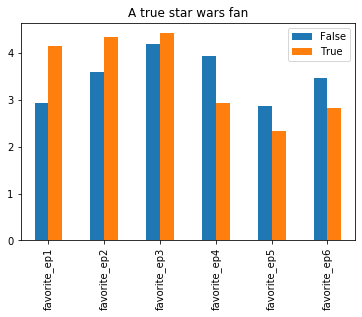

In [27]:
star_wars[favorite_cols].groupby(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]).agg("mean").T.plot.bar(title="A true star wars fan").legend(bbox_to_anchor=(1,1))

True star wars fan are much more skewed toards ep4, 5 and 6, with a super defined distribution in their favour. Non fans are less direct, scoring positively also on other episodes.

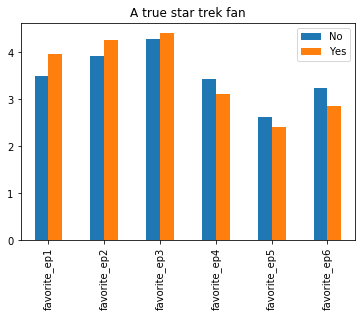

In [28]:
star_wars[favorite_cols].groupby(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]).agg("mean").T.plot.bar(title="A true star trek fan").legend(bbox_to_anchor=(1,1))

No correlation can be appreciated here!

# Analyzing Characters

In [29]:
star_wars.head()

,index,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,favorite_ep1,favorite_ep2,favorite_ep3,favorite_ep4,favorite_ep5,favorite_ep6,feeling_Han Solo,feeling_Luke Skywalker,feeling_Princess Leia Organa,feeling_Anakin Skywalker,feeling_Obi Wan Kenobi,feeling_Emperor Palpatine,feeling_Darth Vader,feeling_Lando Calrissian,feeling_Boba Fett,feeling_C-3P0,feeling_R2 D2,feeling_Jar Jar Binks,feeling_Padme Amidala,feeling_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [35]:
ratings_list = [star_wars[col].value_counts(dropna = False) for col in feel_cols]

In [34]:
ratings_list = [star_wars["feeling_Han Solo"].value_counts(dropna = False)

5.0    610
NaN    372
4.0    151
3.0     44
2.0      8
1.0      1
Name: feeling_Han Solo, dtype: int64

In [41]:
ratings_df = pd.DataFrame(data=ratings_list).T
ratings_df

,feeling_Han Solo,feeling_Luke Skywalker,feeling_Princess Leia Organa,feeling_Anakin Skywalker,feeling_Obi Wan Kenobi,feeling_Emperor Palpatine,feeling_Darth Vader,feeling_Lando Calrissian,feeling_Boba Fett,feeling_C-3P0,feeling_R2 D2,feeling_Jar Jar Binks,feeling_Padme Amidala,feeling_Yoda
1.0,1,3,6,39,7,124,149,8,45,7,6,204,34,8
2.0,8,13,12,83,8,68,102,63,96,23,10,102,58,8
3.0,44,38,48,135,43,213,84,236,248,79,57,164,207,51
4.0,151,219,210,269,159,143,171,223,153,229,185,130,183,144
5.0,610,552,547,245,591,110,310,142,138,474,562,112,168,605
NaN,372,361,363,415,378,528,370,514,506,374,366,474,536,370


In [1]:
ratings_df

NameError: name 'ratings_df' is not defined